       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

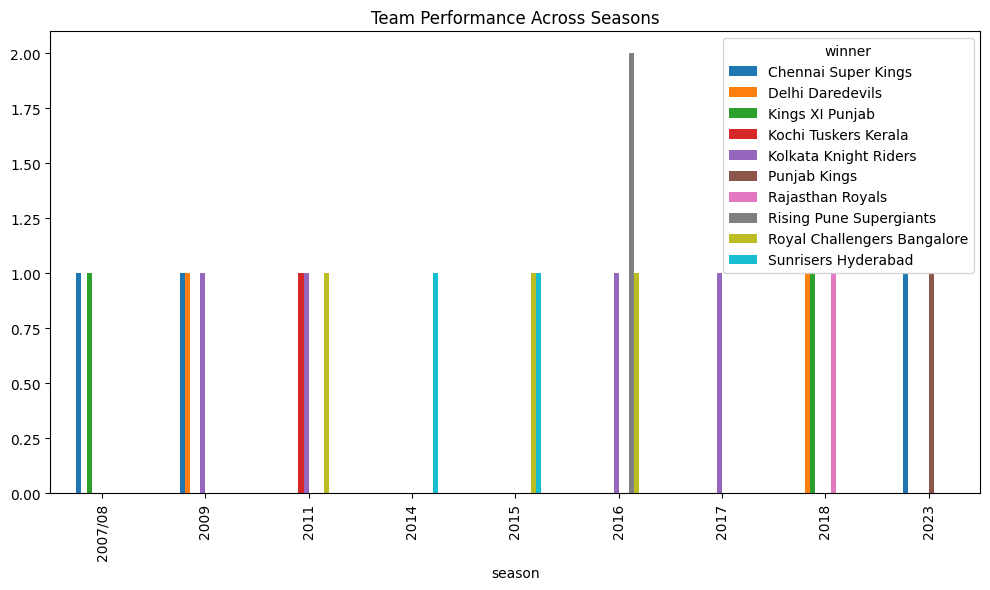

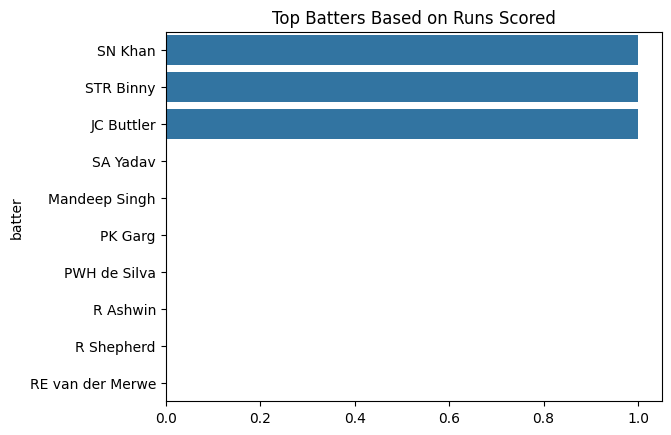

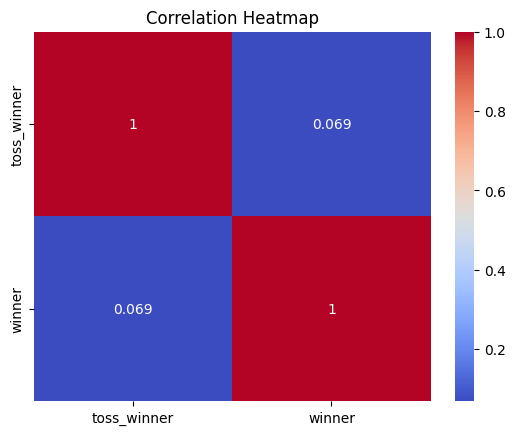

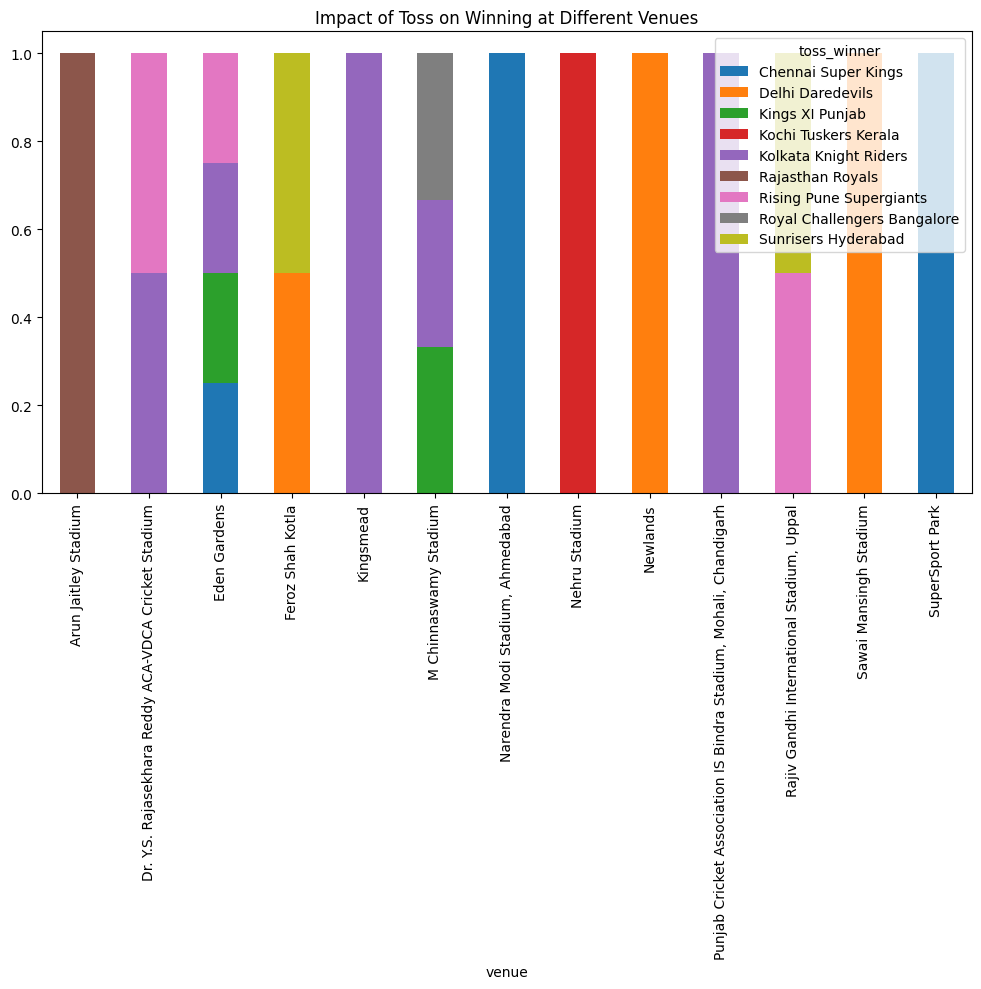

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# Load IPL Datasets (Replace with actual paths)
matches_df = pd.read_csv('/matches.csv')
deliveries_df = pd.read_csv('/deliveries.csv')

# Basic Data Exploration
print(matches_df.head())
print(deliveries_df.head())
print(matches_df.info())
print(deliveries_df.info())
print(matches_df.describe())
print(deliveries_df.describe())

# Data Preprocessing
matches_df.dropna(inplace=True)
deliveries_df.dropna(inplace=True)

# Match & Team Performance Analysis
team_performance = matches_df.groupby(['season', 'winner']).size().unstack(fill_value=0)
team_performance.plot(kind='bar', figsize=(12, 6), title='Team Performance Across Seasons')
plt.show()

# Head-to-Head Comparisons
def head_to_head(team1, team2):
    matches = matches_df[((matches_df['team1'] == team1) & (matches_df['team2'] == team2)) |
                         ((matches_df['team1'] == team2) & (matches_df['team2'] == team1))]
    wins = matches['winner'].value_counts()
    sns.barplot(x=wins.index, y=wins.values)
    plt.title(f'Head-to-Head: {team1} vs {team2}')
    plt.show()

# Player Statistics & Rankings
player_stats = deliveries_df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=player_stats.values, y=player_stats.index)
plt.title('Top Batters Based on Runs Scored')
plt.show()

# Win Prediction & Trend Analysis
correlation_matrix = matches_df[['toss_winner', 'winner']].apply(lambda x: x.factorize()[0]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Venue & Toss Impact Study
venue_win_rate = matches_df.groupby('venue')['toss_winner'].value_counts(normalize=True).unstack()
venue_win_rate.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Impact of Toss on Winning at Different Venues')
plt.show()

# Interactive Dashboard (Using Plotly)
fig = px.bar(matches_df, x='season', y='winner', color='winner', title='IPL Team Performances')
fig.show()
